# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
#test
#response = requests.get(query_url + city).json()

index = 1
#Gather data for City, Cloudiness, Country, Humidity, Lat, Lng, Max Temp, Wind Speed
w_city = []
w_cloud = []
w_country = []
w_date = []
w_humidity = []
w_lat = []
w_lng = []
w_max_temp = []
w_windspeed = []
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {index} of Set 1 | {city}")
        w_city.append(response['name'])
        w_cloud.append(response['clouds']['all'])
        w_country.append(response['sys']['country'])
        w_date.append(response['dt'])
        w_humidity.append(response['main']['humidity'])
        w_lat.append(response['coord']['lat'])
        w_lng.append(response['coord']['lon'])
        w_max_temp.append(response['main']['temp_max'])
        w_windspeed.append(response['wind']['speed'])        
        index += 1
    except KeyError:
        print("City not found. Skipping...")
        index += 1
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | quatre cocos
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | antalya
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | punta alta
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | kyshtovka
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | oussouye
Processing Record 18 of Set 1 | chapais
Processing Record 19 of Set 1 | chulman
Processing Record 20 of Set 1 | ugra
Processing Record 21 of Set 1 | alofi
Processing Record 22 of Set 1 | illoqqortoormiut
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
#Gather data for City, Cloudiness, Country, Humidity, Lat, Lng, Max Temp, Wind Speed
weather_df = pd.DataFrame({
        "City": w_city,
        "Cloudiness": w_cloud,
        "Country": w_country,
        "Date":w_date,
        "Humidity": w_humidity,
        "Lat": w_lat,
        "Lng": w_lng,
        "Max Temp": w_max_temp,
        "Wind Speed": w_windspeed
})
weather_df.to_csv("weatherdata.csv",index=False)
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,100,AR,1551281138,99,-38.31,-60.23,14.48,4.63
1,Ilulissat,5,GL,1551279000,52,69.22,-51.10,-8.00,0.50
2,Hithadhoo,68,MV,1551281128,100,-0.60,73.08,27.66,4.51
3,Quatre Cocos,75,MU,1551281041,74,-20.21,57.76,29.00,4.60
4,Bambous Virieux,75,MU,1551281041,74,-20.34,57.76,29.00,4.60


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

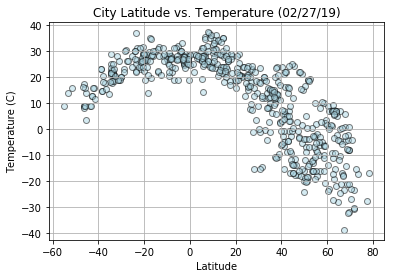

In [91]:
lat_temp_plot = plt.scatter(w_lat, w_max_temp, marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
first_date = datetime.utcfromtimestamp(w_date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Temperature ({first_date})")
plt.grid()
plt.savefig("../Images/CityLatvsTemp.png")

#### Latitude vs. Humidity Plot

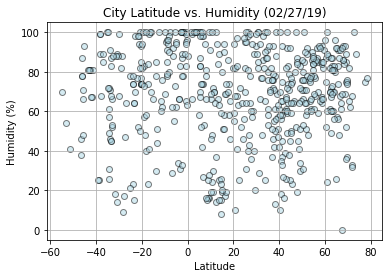

In [92]:
lat_temp_plot = plt.scatter(w_lat, w_humidity, marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
first_date = datetime.utcfromtimestamp(w_date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({first_date})")
plt.grid()
plt.savefig("../Images/CityLatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

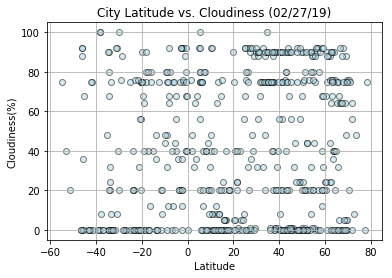

In [93]:
lat_temp_plot = plt.scatter(w_lat, w_cloud, marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
first_date = datetime.utcfromtimestamp(w_date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Cloudiness ({first_date})")
plt.grid()
plt.savefig("../Images/CityLatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

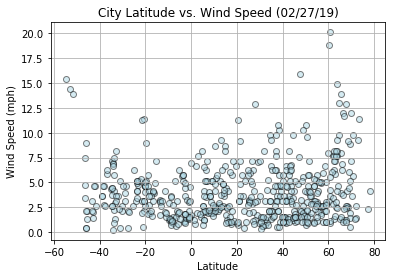

In [94]:
lat_temp_plot = plt.scatter(w_lat, w_windspeed, marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
first_date = datetime.utcfromtimestamp(w_date[0]).strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Wind Speed ({first_date})")
plt.grid()
plt.savefig("../Images/CityLatvsWindspeed.png")